<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal as mvn

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving exNB.csv to exNB (2).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['exNB.csv']), header=None)

# Dataset is now stored in a Pandas Dataframe

In [ ]:
X = data.to_numpy()

In [ ]:
#X[:,-1]
set(X[:,-1])

{0.0, 1.0}

In [ ]:
y = X[:,-1]

In [ ]:
y.shape

(1000,)

In [ ]:
  X = X[:,:-1]

In [ ]:
X.shape

(1000, 2)

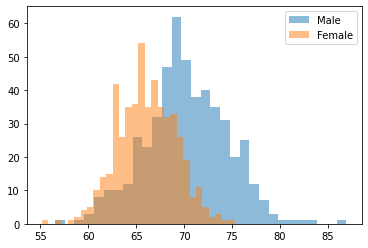

In [ ]:
plt.figure()
plt.hist(X[y==1,0], label = "Male", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,0], label ="Female" , alpha=0.5 , bins = 30)
plt.legend()

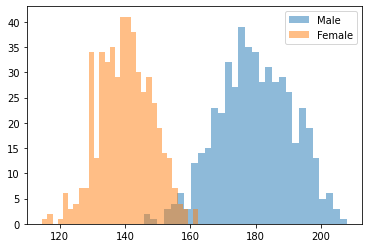

In [ ]:
plt.figure()
plt.hist(X[y==1,1], label = "Male", alpha = 0.5 , bins = 30)
plt.hist(X[y==0,1], label ="Female" , alpha=0.5 , bins = 30)
plt.legend()

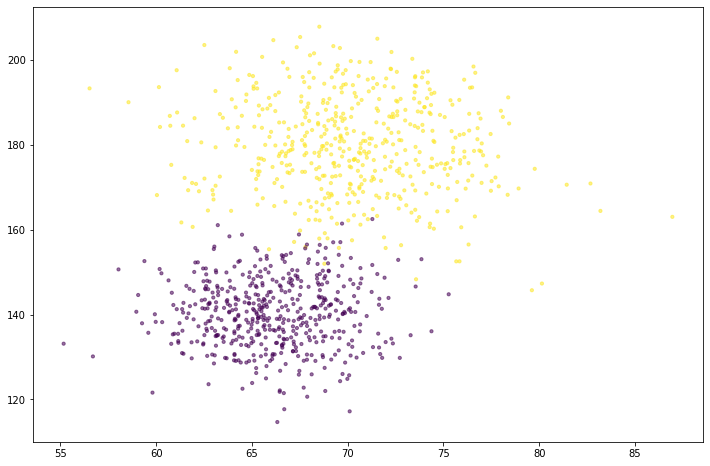

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)

In [20]:
class GaussNB():
  #self is a variable that gives value to every method in the class

  def fit(self ,X ,y ,epsilon = 1e-3):
    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[ y==k , :]
      self.likelyhoods[k] = {"mean" : X_k.mean(axis = 0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X)



  def predict(self, X):

    N , d = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelyhoods.items():
      #Bayes Theorem computation
      P_hat[:,k] = mvn.logpdf(X, l["mean"] , l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [21]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [22]:
gnb = GaussNB()

In [23]:
gnb.fit(X,y)

In [24]:
y_hat = gnb.predict(X)

In [25]:
#Training Accuracy
accuracy(y , y_hat)

0.988

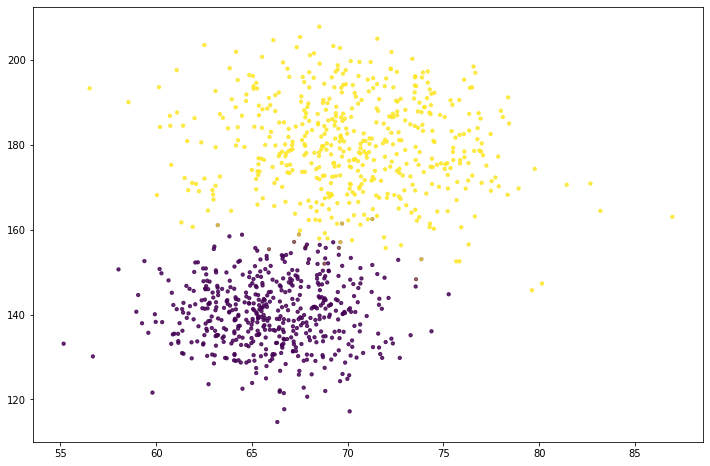

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)
plt.scatter(X[:,0], X[:,-1], c = y_hat , alpha = 0.55 , s=10)